#Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
import math
import skimage

Carga imagen y convierte a RGB

(500, 500, 3)


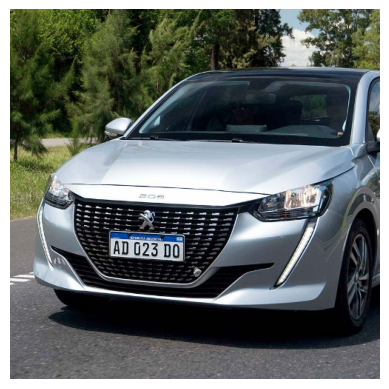

In [3]:
#Carga imagen ejemplo con monedas
img = cv2.imread('007.png') 
print(img.shape)
#Recordando que OpenCV lee las imágenes en BGR, por lo que convertimos para visualizr RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

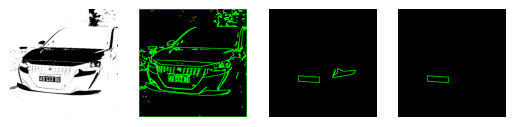

In [4]:
#Convierte la imagen a todos de gris, mostrando el resultado
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cálculo del histograma con 256 bins de una imagen en escala de grises

plt.subplot(1, 4, 1)
plt.axis("off")
plt.imshow(img_gris, cmap='gray')

def apply_threshold(img):
    return cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)[1]

def find_contours(img):
        return cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
def crop_license_plate(self, img, license):
    x, y, w, h = cv2.boundingRect(license)
    return img[y:y+h,x:x+w]
#Threshhold

thresh = apply_threshold(img_gris)
plt.imshow(thresh, cmap='gray')

contours = find_contours(thresh)

canvas = np.zeros_like(img)
cv2.drawContours(canvas,contours,-1,(0,255,0),2)
plt.subplot(1, 4, 2)

plt.axis('off')
plt.imshow(canvas)

#Calculamos el aspect ratio 520x110 mm --> 520/110 = 4,7272727272

min_w=80
max_w=200
min_h=24
max_h=100
matricula_ratio =  3.076923076292
candidates = []

for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  aspect_ratio = float(w) / h
  if (np.isclose(aspect_ratio, matricula_ratio, atol=0.7) and
      (max_w > w > min_w) and
      (max_h > h > min_h)):
        candidates.append(cnt)



plates = np.zeros_like(img)
cv2.drawContours(plates,candidates,-1,(0,255,0),2)
plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(plates)
    
    
#Eliminamos los contornos restantes (nos quedamos con el de más abajo)
ys = []
for cnt in candidates:
    x,y,w,h = cv2.boundingRect(cnt)
    ys.append(y)
license = candidates[np.argmax(ys)]

canvas2 = np.zeros_like(img)
cv2.drawContours(canvas2, [license], -1, (0,255,0),2)
plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(canvas2)
    
    

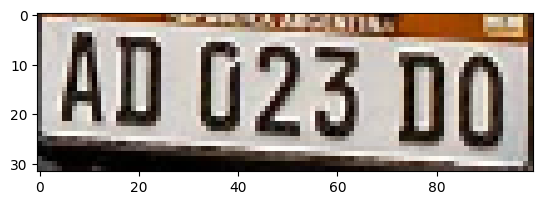

In [146]:
x,y,w ,h = cv2.boundingRect(license)
cropped = img[y:y+h,x:x+w]
plt.imshow(cropped)

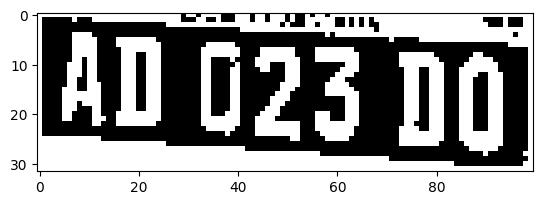

In [147]:
#Pasamos a grises para reconocer caracteres 

gray_cropped = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)

thresh_cropped = apply_threshold(gray_cropped)

plt.imshow(thresh_cropped,cmap="gray")

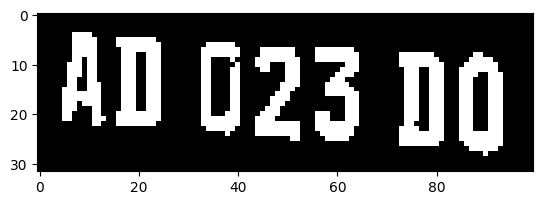

In [148]:
#Queremos eliminar los bordes de la imagen para ello utilizamos skimage+

borderless = skimage.segmentation.clear_border(thresh_cropped)
plt.imshow(borderless, cmap="gray")

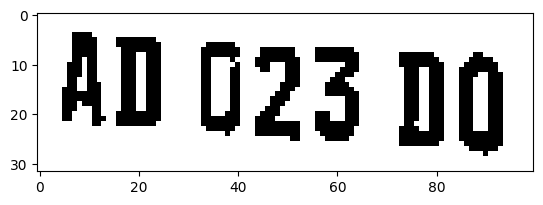

In [149]:
final = cv2.bitwise_not(borderless)
plt.imshow(final,cmap="gray")

In [150]:
import easyocr

#Carga del modelo de lengua
reader = easyocr.Reader(['es']) 
result = reader.readtext(final)

for detection in result:
    print(detection[1])  # La posición 1 contiene el texto detectado


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


ad 023 Do
